In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import viz_config
plt.rcParams['figure.dpi'] = 100

seeds = [42]

In [129]:
dataset = pd.read_csv("../datasets/combinations/test_42.csv")

In [130]:
inter = dataset[dataset["inter"] == True]
disjoint = dataset[dataset["inter"] == False]
risks_inter = inter["risk"]
risks_disjoint = disjoint["risk"]
dists_inter = inter["dist"]
dists_disjoint = disjoint["dist"]


Text(0, 0.5, 'Risque relatif')

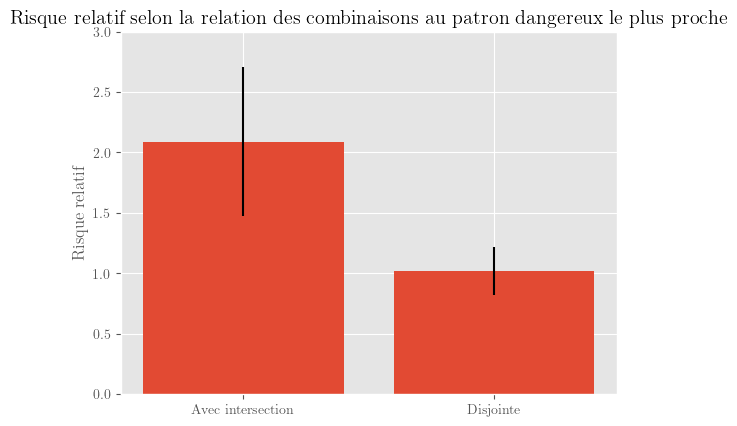

In [143]:
plt.bar(
    ["Avec intersection", "Disjointe"],
    [risks_inter.mean(), risks_disjoint.mean()],
    yerr=[risks_inter.std(), risks_disjoint.std()],
)
plt.ylim(0, 3)

plt.title("Risque relatif selon la relation des combinaisons au patron dangereux le plus proche")
plt.ylabel("Risque relatif")

Text(0, 0.5, 'Risque relatif')

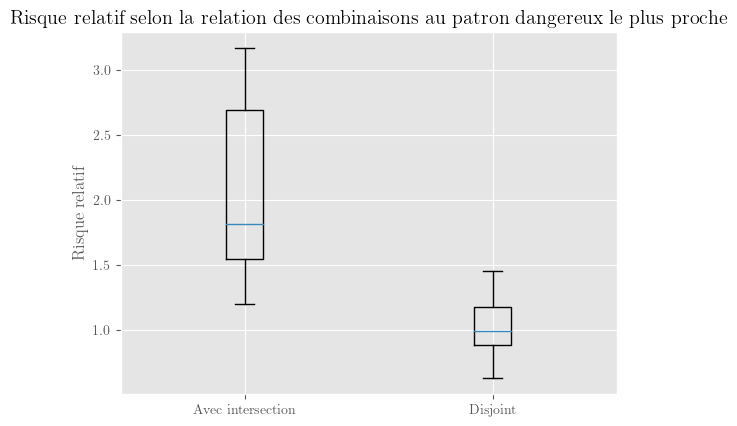

In [142]:
plt.boxplot(
    [risks_inter, risks_disjoint],
    labels=["Avec intersection", "Disjoint"]
)

plt.title("Risque relatif selon la relation des combinaisons au patron dangereux le plus proche")
plt.ylabel("Risque relatif")

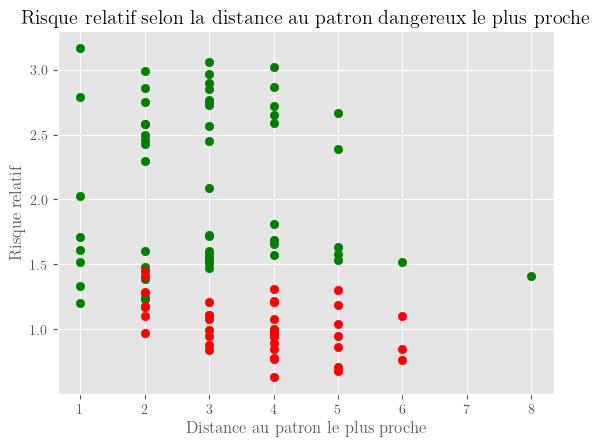

In [133]:
plt.scatter(x=dists_inter, y=risks_inter, color="green")
plt.scatter(x=dists_disjoint, y=risks_disjoint, color="red")
plt.title("Risque relatif selon la distance au patron dangereux le plus proche")
plt.xlabel("Distance au patron le plus proche")
plt.ylabel("Risque relatif")
plt.show()

[nan, 1.9200000000000002, 1.829090909090909, 1.8250000000000004, 1.4444, 1.3774999999999997, 1.0574999999999999, nan, 1.41, nan, nan]
[nan, 0.6612677218797239, 0.6717406770399443, 0.7215781315976808, 0.7271592947903507, 0.6028698726369841, 0.2946502163583119, nan, 0.0, nan, nan]


/tmp/ipykernel_1709466/702342257.py:2: RuntimeWarning: Mean of empty slice.
  means = [v.mean() for v in risks_val]
/home/quo/Documents/Maitrise/venv/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/quo/Documents/Maitrise/venv/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/quo/Documents/Maitrise/venv/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/quo/Documents/Maitrise/venv/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/quo/Documents/Maitrise/venv/lib/python3.10/site-packages/numpy/core/_methods.py:4

Text(0, 0.5, 'Risque relatif')

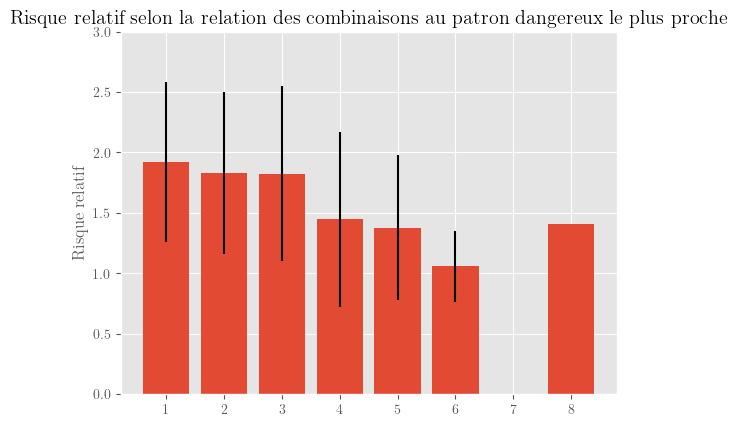

In [141]:
risks_val = [dataset["risk"][dataset["dist"] == i].to_numpy() for i in range(11)]
means = [v.mean() for v in risks_val]
stds = [v.std() for v in risks_val]
print(means)
print(stds)
plt.bar(
    x=[i for i in range(11)],
    height=means,
    yerr=stds,
)
plt.ylim(0, 3)
plt.title("Risque relatif selon la relation des combinaisons au patron dangereux le plus proche")
plt.ylabel("Risque relatif")